In [2]:
from sklearn import datasets
import pandas as pd 
import numpy as np
iris = datasets.load_iris()
df= pd.DataFrame(iris.data[:,:])

In [3]:
labels= iris.target
df["class"]=labels
df

,0,1,2,3,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
df_75 = df.sample(frac = 0.75)
df_25 = df.drop(df_75.index)

In [5]:
labels_75= np.array(df_75.iloc[:,-1])
labels_25= np.array(df_25.iloc[:,-1])

In [6]:
df_75 = df_75.iloc[:,:-1]
df_25 = df_25.iloc[:,:-1]

In [7]:
%matplotlib inline
from minisom import MiniSom

In [8]:
som_grid_rows = 7
som_grid_columns = 7 
iterations = 1000
sigma = 1
learning_rate = 0.5


In [9]:
df_75= np.array(df_75)
df_25= np.array(df_25)

In [10]:
som = MiniSom(x = som_grid_rows, 
              y = som_grid_columns,
              input_len = df_75.shape[1],
              sigma = sigma, 
              learning_rate = learning_rate)
som.random_weights_init(df_75)

In [11]:
som.train_random(df_75,iterations)


In [12]:
target = labels_75

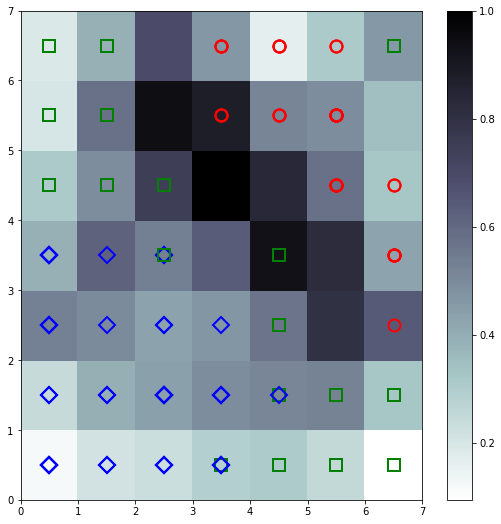

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 9))

plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()

# Plotting the response for each pattern in the iris dataset
# different colors and markers for each label
markers = ['o', 's', 'D']
colors = ['r', 'g', 'b']
for cnt, xx in enumerate(df_75):
    w = som.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5, markers[target[cnt]], markerfacecolor='None',
             markeredgecolor=colors[target[cnt]], markersize=12, markeredgewidth=2)

plt.show()

In [14]:
# !pip3 install hyperopt

In [15]:
from hyperopt import Trials , STATUS_OK ,fmin, tpe, hp

In [16]:
def train_som(x,y,input_len,sigma,learning_rate):
    som = MiniSom(x=x,y=y,input_len=input_len,sigma=sigma,learning_rate=learning_rate)
    som.random_weights_init(df_75)
    som.train_random(df_75,iterations)
    return som 

def plot_som(som):
    plt.figure(figsize=(9,9))
#     bone()
    plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
    plt.colorbar()
    markers = ['o', 's', 'D']
    colors = ['r', 'g', 'b']
    for cnt, xx in enumerate(df_75):
        w = som.winner(xx)  # getting the winner
        # palce a marker on the winning position for the sample xx
        plt.plot(w[0]+.5, w[1]+.5, markers[target[cnt]], markerfacecolor='None',
                 markeredgecolor=colors[target[cnt]], markersize=12, markeredgewidth=2)

    plt.show()

In [17]:
x=7
y=7 
sigma = 0.003
input_len = 4 
learning_rate = 5
iterations = 10000

In [18]:
best = fmin (
        fn =lambda sig : MiniSom(x = x,
                                 y = x,
                                 input_len = input_len,
                                 sigma = sig,
                                 learning_rate = learning_rate
                                ).quantization_error(df_75),
        space = hp.uniform("sig",0.001,x/2.01),
        algo = tpe.suggest,
        max_evals  =200
)
print(best["sig"])

100%|███████| 200/200 [00:01<00:00, 172.33trial/s, best loss: 6.917381990223487]
0.7345372585025147


In [19]:
sigma = best['sig']

In [20]:
space = {
         "sig": hp.uniform("sig",0.001,5),
         "learning_rate" : hp.uniform("learning_rate",0.001,5)
}
def som_fn(space):
    sig = space["sig"]
    learning_rate = space["learning_rate"]
    val = MiniSom (x=x ,
                   y=x, 
                   input_len = input_len ,
                   sigma =sig,
                   learning_rate =learning_rate
                  ).quantization_error(df_75)
    print(val)
    return {'loss':val , 'status':STATUS_OK}
    
trials = Trials()
best = fmin(
        fn = som_fn,
        space= space,
        algo = tpe.suggest, 
        max_evals = 1000,
        trials =trials
)
print( "best{}".format(best))


for i, trial in enumerate (trials.trials[:2]):
    print(i,trial)


7.031007467162422                                                               
7.069200565122088                                                               
6.983750014845437                                                               
6.966693081420858                                                               
6.9681728754550845                                                              
6.980983592039683                                                               
6.94936641570144                                                                
7.018266066235471                                                               
7.049015276107043                                                               
6.940081384845171                                                               
7.2097212686783365                                                              
6.943014544734217                                                               
7.059239454492214           

In [21]:
sigma = best["sig"]
learning_rate = best["learning_rate"]
print("x :{}\ny : {}\nsigma :{}\nlearning_rate :{}".format(x,y,input_len,sigma,learning_rate))


x :7
y : 7
sigma :4
learning_rate :1.4619882245277986


In [22]:
som= train_som(x,y,4,sigma,learning_rate)


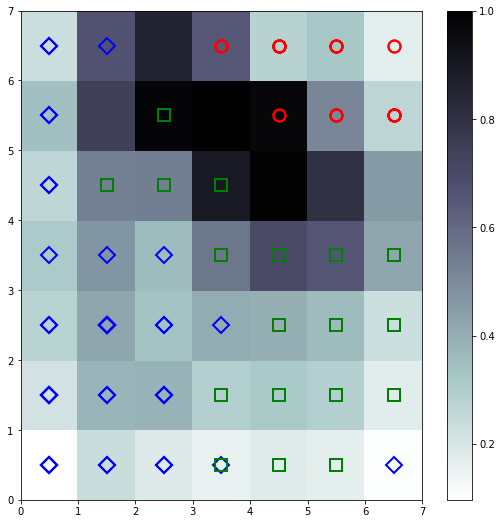

In [23]:
plot_som(som)

# Representative node

In [29]:
df = df_75.copy()
df= pd.DataFrame(df_75)
df["labels"]=labels_75
df

,0,1,2,3,labels
0,4.4,3.2,1.3,0.2,0
1,6.1,3.0,4.6,1.4,1
2,4.8,3.4,1.6,0.2,0
3,5.0,3.5,1.3,0.3,0
4,6.0,3.0,4.8,1.8,2
...,...,...,...,...,...
107,4.6,3.4,1.4,0.3,0
108,6.5,3.0,5.2,2.0,2
109,5.0,3.4,1.5,0.2,0
110,6.2,2.9,4.3,1.3,1


In [40]:
def dist(a,b):
    ans=0
    for i in range(len(a)):
        ans+= (a[i]-b[i])**2 
    return ans**0.5


In [47]:
def represen_node_label(df,label):
    # here data is the dataframe
    df_ = np.array(df[df["labels"]==label].iloc[:,:-1])
    final_dict = {}
    
    dict = {}

    for cnt, xx in enumerate(df_):
        w = som.winner(xx)
        key = (w[0], w[1])
        if key in dict.keys():
            dict[(w[0], w[1])]+=1
        else:
            dict[(w[0], w[1])]=1
    final_x, final_y, vals = 0, 0, 0

    for key, value in dict.items():
        x, y = key[0]*value, key[1]*value
        final_x += x
        final_y += y
        vals +=value
    final_x = final_x/vals
    final_y = final_y/vals
    #print(i, ": ", final_x, final_y)
    final_dict[label] = (final_x, final_y)
    #rint((final_dict))
    print(dict)
    mean=final_dict[label]
    print(mean)
    ans=float("inf")
    res=(0,0)
    for j in dict:
        if dist(j,mean)<ans:
            ans= dist(j,mean)
            res= j
    return res

In [49]:
representative_nodes = [represen_node_label(df,i) for i in range(0,3)]
representative_nodes

{(5, 6): 5, (6, 5): 7, (4, 6): 8, (6, 6): 2, (3, 6): 5, (5, 5): 5, (4, 5): 2}
(4.676470588235294, 5.588235294117647)
{(4, 0): 2, (4, 1): 2, (3, 3): 2, (5, 3): 3, (6, 1): 1, (5, 0): 3, (6, 3): 3, (2, 4): 3, (1, 4): 5, (5, 1): 4, (3, 4): 2, (6, 2): 3, (3, 0): 1, (4, 3): 1, (2, 5): 2, (4, 2): 1, (5, 2): 1, (3, 1): 1}
(3.85, 2.375)
{(3, 0): 1, (0, 2): 2, (2, 1): 3, (1, 1): 2, (1, 2): 5, (0, 5): 2, (2, 3): 1, (3, 2): 1, (0, 0): 3, (0, 6): 2, (0, 1): 4, (1, 3): 1, (2, 2): 2, (2, 0): 2, (1, 0): 2, (0, 4): 2, (0, 3): 1, (1, 6): 1, (6, 0): 1}
(1.0263157894736843, 1.9473684210526316)


[(5, 6), (4, 2), (1, 2)]

# distance calculation for test data 

In [86]:
from statistics import mode
mode(dict[(0, 5)])

2

In [90]:
def getting_labels(df):
    dict = {}
    for label in range(3):
        df_ = np.array(df[df["labels"]==label].iloc[:,:-1])
    
        for cnt, xx in enumerate(df_):
            w = som.winner(xx)
            key = (w[0], w[1])
            if key in dict.keys():
                dict[(w[0], w[1])].append(label)
            else:
                dict[(w[0], w[1])] = [label]
    return dict
dict_ = getting_labels(df)
dict_
label_cnt={}
for i in dict_:
    mode_ =  mode(dict_[i])
    if mode_ in label_cnt:
        label_cnt[mode_]+=1
    else:
        label_cnt[mode_]=1
label_cnt

{0: 7, 1: 18, 2: 18}

In [93]:
def score(node,label,dict_):
    arr=[[dist(i,node),mode(dict_[i])] for i in dict_]
    arr.sort(key=lambda x :x[0])
    val=[arr[:label_cnt[label]]]
    sumi=0
    for i in val:
        if i==label:
            sumi+=1
    return (sumi/label_cnt[label])+0.0001
score((0,0),0,dict_)

0.0001

In [104]:
conf_0=[]
conf_1=[]
conf_2=[]
test_df ={"conf_0":conf_0 ,"conf_1":conf_1,"conf_2":conf_2,"actual_label":labels_25}


In [ ]:
node_conf={}

In [99]:
node_cnf={}
for i in range(0,7):
    
    for j in range(0,7):
        node = (i,j)
        
        c2=np.array([dist(node,representative_nodes[k])+0.001 for k in range(3)])
        c1=np.array([score(node,k,dict_) for k in range(3)])
        final_conf = c1/c2
        final_ans=[final_conf[0]/(sum(final_conf)),final_conf[1]/(sum(final_conf)),final_conf[2]/(sum(final_conf))]
        node_cnf[node]=final_ans
    
node_cnf

{(0, 0): [0.1603079566477285, 0.2799390599810072, 0.5597529833712641],
 (0, 1): [0.12966828425480587, 0.22235679261025096, 0.6479749231349432],
 (0, 2): [0.11113139367022422, 0.17788034285008106, 0.7109882634796948],
 (0, 3): [0.15302190858437026, 0.2163902893703909, 0.6305878020452388],
 (0, 4): [0.21683492504121243, 0.2610939291727243, 0.5220711457860633],
 (0, 5): [0.2753260088897285, 0.2807774480978276, 0.44389654301244386],
 (0, 6): [0.3229420740948375, 0.2854497909155546, 0.39160813498960795],
 (1, 0): [0.15142402459010157, 0.3028060633568987, 0.5457699120529999],
 (1, 1): [0.10613178283754672, 0.21486609645127186, 0.6790021207111815],
 (1, 2): [0.00017665536228935448, 0.00033305241327039, 0.9994902922244402],
 (1, 3): [0.13197906775330065, 0.20865298236232718, 0.6593679498843722],
 (1, 4): [0.22342719205955758, 0.2771124350637789, 0.49946037287666356],
 (1, 5): [0.29885754986051544, 0.2904393169711866, 0.410703133168298],
 (1, 6): [0.3571377561951011, 0.2857244876097979, 0.35713

In [105]:
for i in df_25:
    win_node = som.winner(i)
    conf= node_cnf[win_node]
    conf_0.append(conf[0])
    conf_1.append(conf[1])
    conf_2.append(conf[2])
    #actual_label.append(labels_25[i])


In [108]:
test_df=pd.DataFrame(test_df)
test_df.to_csv("IRIS_RESULT.csv")

In [109]:
test_df

,conf_0,conf_1,conf_2,actual_label
0,0.999581,0.000242,0.000177,0
1,0.999581,0.000242,0.000177,0
2,0.999581,0.000242,0.000177,0
3,0.553995,0.261253,0.184752,0
4,0.689490,0.172502,0.138008,0
5,0.689490,0.172502,0.138008,0
6,0.611596,0.239991,0.148413,0
7,0.999581,0.000242,0.000177,0
8,0.611596,0.239991,0.148413,0
9,0.517456,0.251067,0.231477,0
